## Q1. Explain the concept of precision and recall in the context of classification models.

##
In the context of classification models, precision and recall are two important metrics used to evaluate the performance of the model, especially for binary classification problems (where there are only two classes: positive and negative).

Precision:

Precision measures the accuracy of positive predictions made by the model. It is the ratio of true positive predictions (correctly predicted positive instances) to the total number of instances predicted as positive (both true positives and false positives). In other words, precision quantifies how many of the predicted positive instances are actually correct.
Precision = True Positives / (True Positives + False Positives)

Recall (Sensitivity):

Recall, also known as sensitivity or true positive rate (TPR), measures the model's ability to capture positive instances correctly. It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. In other words, recall quantifies how many of the actual positive instances are correctly identified by the model.

Recall = True Positives / (True Positives + False Negatives)

In Python, you can calculate precision and recall using scikit-learn, a popular machine learning library:

In [1]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Example ground truth and predicted labels for a binary classification problem
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0])
y_pred = np.array([1, 1, 1, 0, 1, 0, 0, 1])

# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.4
Recall: 0.5


## Q2. What is the F1 score and how is it calculated? How is it different from precision and recall?

##
The F1 score is a single performance metric that combines precision and recall into a balanced measure, particularly useful in cases where the class distribution is imbalanced. It is the harmonic mean of precision and recall and is calculated using the following formula:

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

The F1 score ranges from 0 to 1, where 1 represents perfect precision and recall, and 0 indicates poor performance.

The F1 score is different from precision and recall in that it provides a trade-off between the two metrics. Precision focuses on the accuracy of positive predictions, while recall emphasizes the ability to capture positive instances. However, optimizing for precision or recall alone may lead to imbalanced performance, especially when one of them dominates.

Consider the scenario of fraud detection in credit card transactions. If the model prioritizes precision, it will aim to correctly label transactions as fraudulent but may miss some fraudulent transactions (low recall). Conversely, if the model prioritizes recall, it will capture most fraudulent transactions but may also incorrectly label some legitimate transactions as fraudulent (low precision).

The F1 score balances precision and recall and can be useful when there is a need to consider both aspects of the model's performance. It becomes particularly relevant when the class distribution is imbalanced, and one metric alone does not give an accurate picture of the model's performance.



In [2]:
import numpy as np
from sklearn.metrics import f1_score

# Example ground truth and predicted labels for a binary classification problem
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0])
y_pred = np.array([1, 1, 1, 0, 1, 0, 0, 1])

# Calculate the F1 score
f1 = f1_score(y_true, y_pred)

print("F1 Score:", f1)

F1 Score: 0.4444444444444445


## Q3. What is ROC and AUC, and how are they used to evaluate the performance of classification models?

## 

ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve) are evaluation metrics commonly used to assess the performance of classification models, especially in binary classification problems. They are particularly useful when dealing with imbalanced datasets or when you need to analyze the trade-off between true positive rate (recall) and false positive rate.

ROC (Receiver Operating Characteristic) Curve:

The ROC curve is a graphical representation of the model's performance across different classification thresholds. It plots the true positive rate (sensitivity or recall) on the y-axis against the false positive rate (1-specificity) on the x-axis. Each point on the ROC curve corresponds to a specific threshold, determining how the model classifies positive and negative instances.
A perfect model would have an ROC curve that passes through the top-left corner (100% true positive rate and 0% false positive rate), while a random or non-informative model would have an ROC curve that follows the diagonal (line of no-discrimination).

AUC (Area Under the Curve):

The AUC is a scalar value representing the area under the ROC curve. It quantifies the model's ability to distinguish between positive and negative instances across various classification thresholds. An AUC value of 1 indicates a perfect model, while an AUC of 0.5 represents a random or non-informative model (no better than random guessing).

A higher AUC value indicates better model performance in terms of the trade-off between true positive rate and false positive rate. It is often used to compare and select models when you have multiple classifiers or when tuning hyperparameters to find the best-performing model.

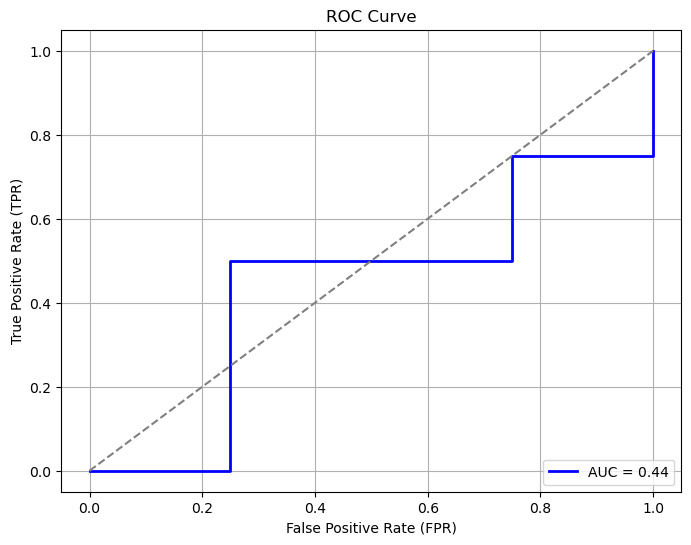

AUC: 0.4375


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Example ground truth and predicted labels for a binary classification problem
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0])
y_pred_probs = np.array([0.8, 0.6, 0.7, 0.4, 0.9, 0.3, 0.2, 0.65])  # Predicted probabilities

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
auc_score = roc_auc_score(y_true, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC:", auc_score)

## Q4. How do you choose the best metric to evaluate the performance of a classification model? What is multiclass classification and how is it different from binary classification?

## 
Choosing the best metric to evaluate the performance of a classification model depends on the specific problem and the desired characteristics of the model's performance. There is no one-size-fits-all metric, and the choice may vary based on the following factors:

Class Distribution: If the dataset is imbalanced (one class significantly outnumbering the other), accuracy may not be an appropriate metric, and other metrics like precision, recall, F1 score, or area under the ROC curve (AUC) might be more suitable.

Business Needs: Consider the consequences of false positives and false negatives. For example, in medical diagnosis, false negatives (missing a disease) might be more critical than false positives (false alarms).

Model Complexity: Some metrics are easier to interpret and explain to stakeholders, while others may provide a more nuanced understanding of the model's performance.

Model Objective: Focus on the specific problem and objective of the model. If the main goal is to minimize false positives, precision might be more relevant. If the goal is to minimize false negatives, recall might be prioritized.

It is common to use a combination of metrics to gain a comprehensive view of the model's performance.

Regarding multiclass classification:

Multiclass classification is a type of classification problem where there are more than two distinct classes to be predicted. Each instance in the dataset belongs to one and only one class. It is different from binary classification, where there are only two classes (positive and negative).

For example, in a multiclass classification problem, you may have a dataset of images of animals, and the task is to classify each image into one of several categories, such as "dog," "cat," "elephant," "giraffe," and so on.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Q5. Explain how logistic regression can be used for multiclass classification.

##
Logistic Regression can be extended to perform multiclass classification using various strategies, such as one-vs-rest (OvR) or one-vs-one (OvO) approaches. In Python, the LogisticRegression class from scikit-learn supports multiclass classification out of the box and uses the OvR strategy by default.

One-vs-Rest (OvR) Approach:
In the OvR approach, the original multiclass problem is transformed into multiple binary classification subproblems. For each class, a separate binary classifier is trained to distinguish that class from the rest of the classes. During prediction, all binary classifiers are evaluated, and the class with the highest probability is assigned to the input sample.

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model with the default OvR strategy
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Q6. Describe the steps involved in an end-to-end project for multiclass classification.

## 
An end-to-end project for multiclass classification involves several steps, from data preparation to model evaluation. Below is a general outline of the steps involved in a typical multiclass classification project using Python:

Data Collection and Understanding:

Identify the problem and define the target variable (class labels).
Gather and acquire the dataset, ensuring it contains features and corresponding class labels.
Explore the dataset to understand its structure, features, and class distribution.
Data Preprocessing and Cleaning:

Handle missing values, if any, through imputation or removal.
Perform feature scaling or normalization, if necessary, to bring all features to a similar scale.
Encode categorical variables using techniques like one-hot encoding.
Data Splitting:

Split the dataset into training and testing sets (and optionally, validation set) using techniques like train_test_split from scikit-learn.
Model Selection and Training:

Choose a suitable classification algorithm for multiclass classification (e.g., Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, etc.).
Train the selected model on the training dataset using the fit method.
Model Evaluation:

Evaluate the model's performance on the testing dataset using various metrics like accuracy, precision, recall, F1 score, and the confusion matrix.
Analyze the results to gain insights into the model's strengths and weaknesses.
Hyperparameter Tuning (Optional):

Fine-tune the model's hyperparameters to improve performance using techniques like GridSearchCV or RandomizedSearchCV from scikit-learn.
Model Deployment (Optional):

If the model meets the desired performance criteria, deploy it to make predictions on new, unseen data.
Monitoring and Maintenance (Optional):

Continuously monitor the model's performance and retrain or update it as new data becomes available.

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Q7. What is model deployment and why is it important?

##
Model deployment refers to the process of integrating a trained machine learning model into a production environment, making it accessible for real-world use. It involves taking the model, along with any necessary preprocessing steps, and making it available for making predictions on new, unseen data. In Python, model deployment typically involves creating an API or web service that allows users or applications to interact with the model and obtain predictions.

Model deployment is essential for several reasons:

Real-world Applications: The primary purpose of building a machine learning model is to use it to make predictions on new data in real-world scenarios. Model deployment enables the model to be used in production to provide valuable insights and predictions to end-users or applications.

Scalability: Deploying a model allows it to handle multiple requests simultaneously, making it scalable for serving predictions to a large number of users or applications.

Continuous Learning: In many real-world applications, new data becomes available over time. Model deployment facilitates retraining and updating the model with new data to ensure it stays relevant and accurate.

Automation: Model deployment enables the automation of predictions, reducing the need for manual intervention and streamlining decision-making processes.

Business Value: By deploying a successful machine learning model, organizations can derive business value from the insights it provides, such as optimizing operations, improving customer experiences, or making data-driven decisions.

In Python, various tools and libraries can be used for model deployment, such as Flask, Django, FastAPI, and cloud-based services like AWS Lambda, AWS SageMaker, Google Cloud Functions, or Azure Functions. These tools enable developers to create APIs or web services that can be accessed over the internet, allowing the model to be integrated into web applications, mobile apps, or other software systems.

Overall, model deployment is a critical step in the machine learning lifecycle as it transforms the trained model into a practical and usable tool that can deliver value to businesses and users in real-world applications. It bridges the gap between the development of the machine learning model and its application in solving real-world problems.

## Q8. Explain how multi-cloud platforms are used for model deployment.

## 
Multi-cloud platforms are used to deploy machine learning models on multiple cloud service providers simultaneously. These platforms provide the flexibility to run applications and services across different cloud environments, avoiding vendor lock-in and providing redundancy and failover capabilities.

In Python, multi-cloud platforms can be used for model deployment by leveraging cloud-agnostic tools and libraries. Here's a high-level overview of how it works:

Choose a Multi-Cloud Platform: There are several multi-cloud platforms available that support deploying Python applications and machine learning models. Examples include Kubernetes, OpenShift, and Cloud Foundry. These platforms provide tools and services to manage applications across different cloud providers.

Containerize the Model: Prepare the machine learning model for deployment by containerizing it. A container is a lightweight, portable package that includes the application code, dependencies, and libraries needed to run the model. Containers provide consistency across different environments, making it easier to deploy the model on multiple cloud platforms.

Create Deployment Configurations: Define the deployment configurations for the model on the multi-cloud platform. This includes specifying the resources required (CPU, memory, etc.), environment variables, and any other settings necessary for the model to run successfully.

Deploy the Model: Use the multi-cloud platform's tools or interfaces to deploy the containerized model. The platform will handle the deployment across the selected cloud providers, ensuring the model is up and running on each cloud environment.

Load Balancing and Failover: Multi-cloud platforms often include features for load balancing and failover. This allows the model to handle incoming requests efficiently, distribute the load across different cloud instances, and provide high availability in case of failures or outages.

Monitoring and Scaling: The multi-cloud platform provides monitoring and logging capabilities to track the model's performance and usage. It also allows for automatic scaling, so the model can handle increased traffic or demand without manual intervention.

Centralized Management: A significant advantage of using multi-cloud platforms is centralized management. You can manage the deployed models across different cloud providers from a single interface, simplifying operations and reducing complexity.

By using multi-cloud platforms, organizations can take advantage of different cloud providers' strengths and offerings, achieve better redundancy and reliability, and avoid vendor lock-in. This approach enhances the model's availability, performance, and scalability while providing flexibility in case of changes in cloud provider strategies or pricing models.

Overall, multi-cloud platforms provide a powerful solution for deploying machine learning models in a cloud-agnostic manner, enabling organizations to harness the full potential of multiple cloud service providers while ensuring a robust and resilient infrastructure for model deployment.


## Q9. Discuss the benefits and challenges of deploying machine learning models in a multi-cloud environment.

##
Deploying machine learning models in a multi-cloud environment comes with various benefits and challenges. Let's explore them in detail:

Benefits of deploying machine learning models in a multi-cloud environment:

Redundancy and High Availability: Deploying models across multiple cloud providers ensures redundancy. If one cloud provider experiences downtime or issues, the model can still function and serve predictions from other cloud instances, enhancing overall availability and minimizing service disruptions.

Avoiding Vendor Lock-In: Multi-cloud deployment allows organizations to avoid vendor lock-in. By being cloud-agnostic, businesses can switch between cloud providers easily, based on changing requirements, pricing, or other factors, without significant architectural changes.

Geo-distribution and Latency Optimization: Multi-cloud deployment enables the deployment of models closer to end-users or data sources across different regions, reducing network latency and improving response times.

Cost Optimization: Different cloud providers offer various pricing models and discounts. By leveraging multi-cloud deployment, organizations can take advantage of the best pricing options for different components of the application stack, leading to cost optimization.

Compliance and Data Sovereignty: Some organizations need to adhere to specific data sovereignty regulations, requiring data to be stored and processed within specific geographic boundaries. Deploying models across multiple clouds allows for better compliance with such regulations.

Disaster Recovery and Business Continuity: In case of major incidents, such as natural disasters or data center outages, multi-cloud deployment provides an additional layer of disaster recovery and business continuity.

Challenges of deploying machine learning models in a multi-cloud environment:

Complexity: Managing models across multiple clouds adds complexity to the infrastructure, deployment, and management processes. This complexity may require additional expertise and resources to handle effectively.

Data Synchronization and Consistency: Ensuring data synchronization and consistency across multiple cloud instances can be challenging. Managing data replication and keeping data updated in real-time may require careful planning and synchronization mechanisms.

Security and Compliance: Each cloud provider has its security policies and compliance requirements. Ensuring uniform security and compliance practices across all clouds can be demanding, requiring robust security measures and continuous monitoring.

Interoperability and Portability: Deploying models in a multi-cloud environment may require developing applications that can seamlessly work with different cloud providers' APIs and services. Ensuring portability and interoperability across clouds can be a technical challenge.

Cost Management: While multi-cloud deployment can lead to cost optimization, it can also introduce complexities in managing costs across multiple providers. Organizations need to carefully monitor and control costs to avoid unexpected expenses.

Performance Variability: Different cloud providers may have variations in performance and capabilities. Ensuring consistent performance and optimal resource allocation across all clouds requires careful tuning and monitoring.

In summary, deploying machine learning models in a multi-cloud environment offers various benefits, including redundancy, flexibility, cost optimization, and compliance. However, it also introduces challenges related to complexity, data synchronization, security, and cost management. Organizations need to carefully consider their specific requirements and evaluate the trade-offs before adopting a multi-cloud strategy for model deployment in Python or any other programming language.